## First Load the data. Check the data details. 

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

We're not talking about Star Trek stuff here; let's make it real - a black & white image for example, contains three dimensions of data: X position, Y position, and brightness at each point. Distilling that down to two dimensions can be useful for things like image compression and facial recognition, because it distills out the information that contributes most to the variance in the data set.

Let's do this with a simpler example: the Iris data set that comes with scikit-learn. It's just a small collection of data that has four dimensions of data for three different kinds of Iris flowers: The length and width of both the petals and sepals of many individual flowers from each species. Let's load it up and have a look:

In [1]:
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

food = pd.read_excel(r'C:\Users\Diego Alves\Desktop\Data_sets\nndb_flat.xlsx', sheet_name='PCA')
Foodnames = pd.read_excel(r'C:\Users\Diego Alves\Desktop\Data_sets\nndb_flat.xlsx', sheet_name='Names')

numSamples, numFeatures = food.shape
print(numSamples)
print(numFeatures)

print(list(Foodnames.Foodnames))

929
5
['chocolate', 'juice', 'salad']


## Turn the category data into codes, in this case the target: chocolate, juice and salad. 

In [2]:
food.target = pd.Categorical(food.target)

In [3]:
food['target'] = food.target.cat.codes

In [4]:
print(food)

     Protein_g  Fat_g  Sugar_g  Energy_kcal  target
0        10.46  10.00   10.000          717       0
1        10.36  10.00   10.000          717       0
2        10.20  10.00   10.000          876       0
3        10.24  10.00   10.109          353       0
4        10.25  10.00   10.000          371       0
..         ...    ...      ...          ...     ...
924      18.50  25.10   10.000          237       1
925     210.54  10.84   10.000          168       1
926      10.00  10.00   73.200          194       2
927      16.10   1.40   10.000          137       1
928      19.80  10.50   10.000          213       1

[929 rows x 5 columns]


In [5]:
data = food[["Protein_g","Fat_g","Sugar_g","Energy_kcal"]]
y = Foodnames

So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 dimensions - called features here, and three distinct Iris species that each flower is classified into.

While we can visualize 2 or even 3 dimensions of data pretty easily, visualizing 4D data isn't something our brains can do. So let's distill this down to 2 dimensions, and see how well it works:

In [10]:
X = data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [11]:
print(pca.components_)

[[-1.92973837e-04 -8.53397582e-05 -1.30613107e-04  9.99999969e-01]
 [-3.36782387e-02  4.07949455e-02  9.98599786e-01  1.27412637e-04]]


Let's see how much information we've managed to preserve:

In [12]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[9.99865483e-01 1.09673358e-04]
0.999975156543983


That's pretty cool. Although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! The second dimension just gives us an additional 5%; altogether we've only really lost less than 3% of the variance in our data by projecting it down to two dimensions.

As promised, now that we have a 2D representation of our data, we can plot it:

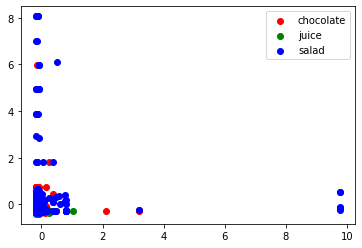

In [16]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(Foodnames.Foodnames))
pl.figure()
for i, c, label in zip(Foodnames.Binary, colors, Foodnames.Foodnames):
    pl.scatter(X_pca[food.target == i, 0], X_pca[food.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()

You can see the three different types of Iris are still clustered pretty well. If you think about it, this probably works well because the overall size of an individual flower probably makes both the petal and sepal sizes increase by a similar amount. Although the actual numbers on this graph have no intuitive meaning, what we're probably seeing is measure of the ratio of width to height for petals and sepals - and PCA distilled our data down to that on its own.